In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# loading the dataset
df = pd.read_csv('Salary_Ranges_by_Job_Classification.csv')
df.head()

,SetID,Job Code,Eff Date,Sal End Date,Salary SetID,Sal Plan,Grade,Step,Biweekly High Rate,Biweekly Low Rate,Union Code,Extended Step,Pay Type
0,COMMN,0109,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$0.00,$0.00,330,0,C
1,COMMN,0110,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$15.00,$15.00,323,0,D
2,COMMN,0111,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$25.00,$25.00,323,0,D
3,COMMN,0112,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$50.00,$50.00,323,0,D
4,COMMN,0114,07/01/2009 12:00:00 AM,06/30/2010 12:00:00 AM,COMMN,SFM,00000,1,$100.00,$100.00,323,0,M


In [4]:
df.shape

(1356, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SetID               1356 non-null   object
 1   Job Code            1356 non-null   object
 2   Eff Date            1356 non-null   object
 3   Sal End Date        1356 non-null   object
 4   Salary SetID        1356 non-null   object
 5   Sal Plan            1356 non-null   object
 6   Grade               1356 non-null   object
 7   Step                1356 non-null   int64 
 8   Biweekly High Rate  1356 non-null   object
 9   Biweekly Low Rate   1356 non-null   object
 10  Union Code          1356 non-null   int64 
 11  Extended Step       1356 non-null   int64 
 12  Pay Type            1356 non-null   object
dtypes: int64(3), object(10)
memory usage: 137.8+ KB


In [6]:
df.isnull().sum()

SetID                 0
Job Code              0
Eff Date              0
Sal End Date          0
Salary SetID          0
Sal Plan              0
Grade                 0
Step                  0
Biweekly High Rate    0
Biweekly Low Rate     0
Union Code            0
Extended Step         0
Pay Type              0
dtype: int64

In [7]:
# descriptive statistics
df.describe()

,Step,Union Code,Extended Step
count,1356.000000,1356.000000,1356.000000
mean,1.294985,392.676991,0.150442
std,1.045816,338.100562,1.006734
min,1.000000,1.000000,0.000000
25%,1.000000,21.000000,0.000000
50%,1.000000,351.000000,0.000000
75%,1.000000,790.000000,0.000000
max,5.000000,990.000000,11.000000


In [8]:
df_temp = df[['Grade', 'Biweekly High Rate']]
df_temp.head(3)

,Grade,Biweekly High Rate
0,00000,$0.00
1,00000,$15.00
2,00000,$25.00


In [9]:
type(df_temp)

pandas.core.frame.DataFrame

In [10]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Grade               1356 non-null   object
 1   Biweekly High Rate  1356 non-null   object
dtypes: object(2)
memory usage: 21.3+ KB


In [11]:
df_temp.describe()

,Grade,Biweekly High Rate
count,1356,1356
unique,688,593
top,00000,$3460.00
freq,61,12


In [12]:
df_temp['Biweekly High Rate'] = df_temp['Biweekly High Rate'].astype(float)

ValueError: could not convert string to float: '$0.00'

In [13]:
df_temp['Biweekly High Rate'] = df_temp['Biweekly High Rate'].map(lambda value: value.replace('$', ''))
df_temp.head()

,Grade,Biweekly High Rate
0,00000,0.00
1,00000,15.00
2,00000,25.00
3,00000,50.00
4,00000,100.00


In [14]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1356 entries, 0 to 1355
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Grade               1356 non-null   object
 1   Biweekly High Rate  1356 non-null   object
dtypes: object(2)
memory usage: 21.3+ KB


In [15]:
df_temp['Biweekly High Rate'] = df_temp['Biweekly High Rate'].astype(float)

In [16]:
df_temp.describe()

,Biweekly High Rate
count,1356.000000
mean,3161.727021
std,1481.002904
min,0.000000
25%,2145.000000
50%,2856.500000
75%,3703.000000
max,12120.770000


<AxesSubplot:>

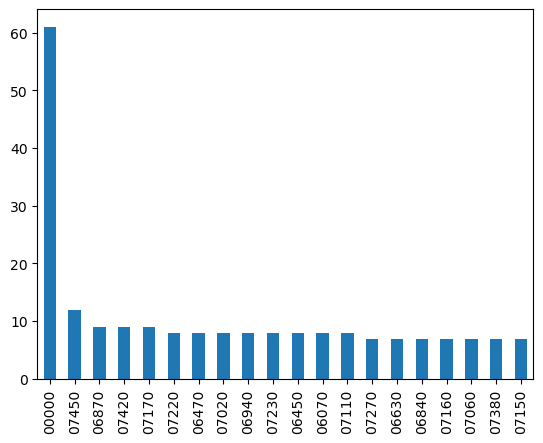

In [20]:
df['Grade'].value_counts().head(20).plot(kind='bar')

<AxesSubplot:ylabel='Grade'>

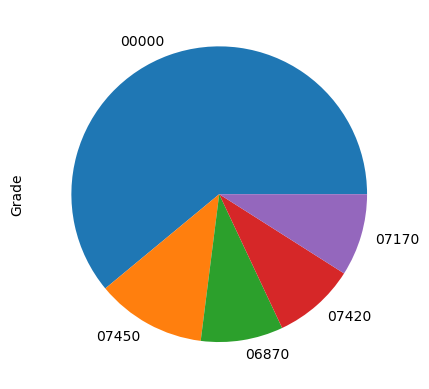

In [22]:
df['Grade'].value_counts().head(5).plot(kind='pie')

In [23]:
df_survey = pd.read_csv('2013_SFO_Customer_Survey.csv')
df_survey.head()

,RESPNUM,CCGID,RUN,INTDATE,GATE,STRATA,PEAK,METHOD,AIRLINE,FLIGHT,...,Q17_COUNTRY,HOME,Q18_AGE,Q19_SEX,Q20_INCOME,Q21_HIFLYER,Q22A_USESJC,Q22B_USEOAK,LANG,WEIGHT
0,1,1.0,1215,2,12,1,1,1,21,1437,...,US,1,2,1,1,2,2,1,1,0.553675
1,2,2.0,1215,2,12,1,1,1,21,1437,...,US,5,6,1,0,3,2,1,1,0.553675
2,3,3.0,1215,2,12,1,1,1,21,1437,...,US,1,4,2,2,3,2,2,1,0.553675
3,4,4.0,1215,2,12,1,1,1,21,1437,...,US,90,4,1,2,2,2,2,1,0.553675
4,5,5.0,1215,2,12,1,1,1,21,1437,...,US,10,3,1,3,1,0,1,1,0.553675


In [24]:
df_survey.shape

(3535, 95)

<AxesSubplot:>

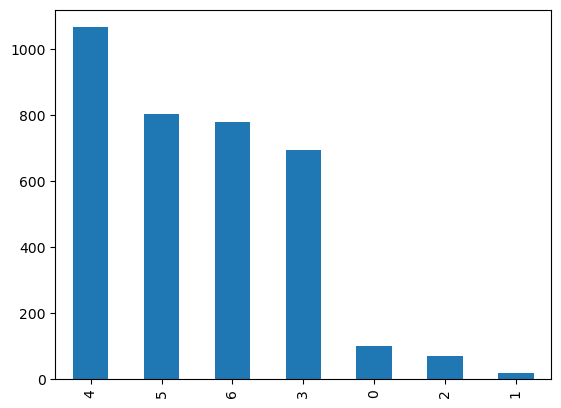

In [27]:
df_survey['Q7A_ART'].value_counts().plot(kind='bar')

In [28]:
cust_rating_art = df_survey['Q7A_ART']

In [29]:
cust_rating_art.describe()

count    3535.000000
mean        4.300707
std         1.341445
min         0.000000
25%         3.000000
50%         4.000000
75%         5.000000
max         6.000000
Name: Q7A_ART, dtype: float64

In [31]:
cust_rating_art = cust_rating_art[(cust_rating_art >= 1) & (cust_rating_art <=5)]

<AxesSubplot:>

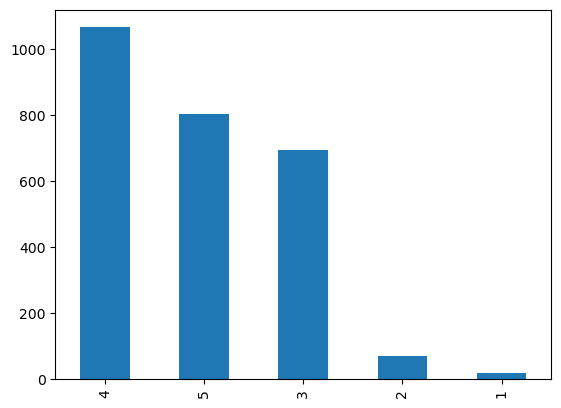

In [32]:
cust_rating_art.value_counts().plot(kind='bar')

In [33]:
df_climate = pd.read_csv('GlobalLandTemperaturesByCity.csv')

In [34]:
df_climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [35]:
df_climate.shape

(8599212, 7)

In [36]:
df_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   dt                             object 
 1   AverageTemperature             float64
 2   AverageTemperatureUncertainty  float64
 3   City                           object 
 4   Country                        object 
 5   Latitude                       object 
 6   Longitude                      object 
dtypes: float64(2), object(5)
memory usage: 459.2+ MB


<AxesSubplot:>

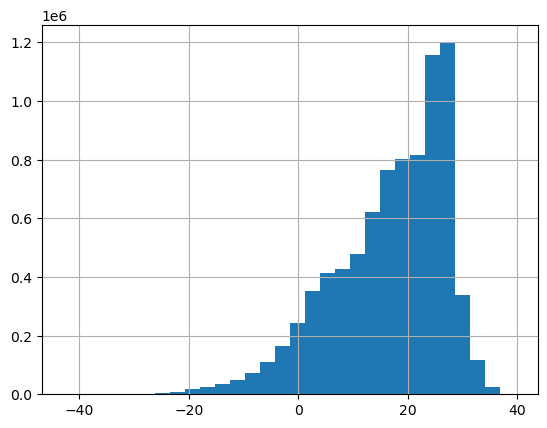

In [37]:
df_climate['AverageTemperature'].hist(bins = 30)

In [38]:
df_climate['AverageTemperature'].describe()

count    8.235082e+06
mean     1.672743e+01
std      1.035344e+01
min     -4.270400e+01
25%      1.029900e+01
50%      1.883100e+01
75%      2.521000e+01
max      3.965100e+01
Name: AverageTemperature, dtype: float64

In [39]:
df_climate['dt'] = pd.to_datetime(df_climate['dt'])

In [40]:
df_climate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   dt                             datetime64[ns]
 1   AverageTemperature             float64       
 2   AverageTemperatureUncertainty  float64       
 3   City                           object        
 4   Country                        object        
 5   Latitude                       object        
 6   Longitude                      object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 459.2+ MB


In [41]:
df_climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [42]:
df_climate['year'] = df_climate['dt'].map(lambda x: x.year)
df_climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1743
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744


In [43]:
df_climate['century'] = df_climate['year']//100 + 1

In [44]:
df_climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,century
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743,18
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1743,18
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744,18
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744,18
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E,1744,18


In [45]:
df_climate.dropna(inplace=True)

In [46]:
df_climate.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,century
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E,1743,18
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E,1744,18
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E,1744,18
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E,1744,18
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E,1744,18


In [47]:
df_climate_canada = df_climate.loc[df_climate['Country'] == 'Canada']
df_climate_canada.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,year,century
32382,1828-01-01,-2.763,2.617,Abbotsford,Canada,49.03N,122.45W,1828,19
32383,1828-02-01,0.393,1.936,Abbotsford,Canada,49.03N,122.45W,1828,19
32384,1828-03-01,4.137,1.910,Abbotsford,Canada,49.03N,122.45W,1828,19
32386,1828-05-01,10.630,2.346,Abbotsford,Canada,49.03N,122.45W,1828,19
32387,1828-06-01,14.425,1.939,Abbotsford,Canada,49.03N,122.45W,1828,19


<AxesSubplot:>

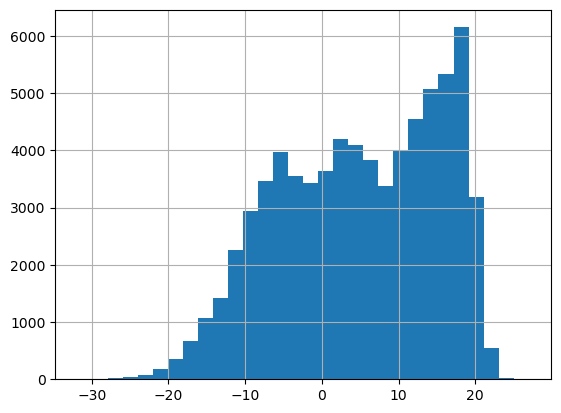

In [48]:
df_climate_canada['AverageTemperature'].hist(bins=30)

<AxesSubplot:xlabel='year'>

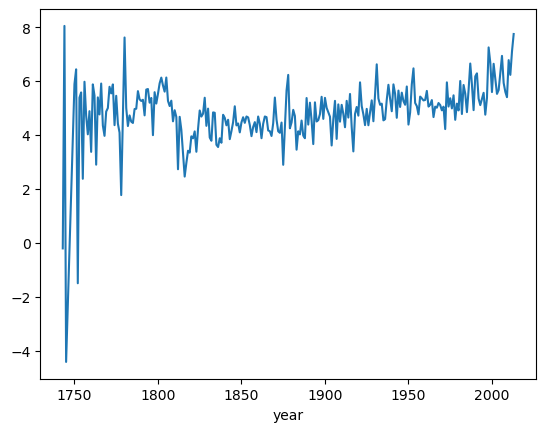

In [50]:
df_climate_canada.groupby('year')['AverageTemperature'].mean().plot()